---
title: The Bernoulli distribution
toc: true
---


The [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) came up a in couple of different contexts the past week. First, I was trying to get started with Kaggle on the [Titanic set](https://www.kaggle.com/c/titanic) when one of the tutorials used the mean of the survival list (a vector of 0's and 1's, which is actually a binomial distirbution) to calculate survival probability. Calculating the mean wasn't something I immediately thought of but remembered it from Khan Academy lessons. The second reminder of the Bernoulli distribution came up when talking with my manager, who reminded me that the [Bernoulli distribution can be the starting point for deriving other common distributions](https://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/).

In this post, I'll go over the Bernoulli distribution with some coding implementations and examples.

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt



The Bernoulli distribution is the result of a single coin toss. It is one trial of a binomial distribution. I don't immediately think of a single trial as a "distribution" but it is and it consists of only two possible values, which are 0 (tails/false) and 1 (heads/true). In the case of an unbiased coin, the probability that the toss will result in a heads is the same probability that it will be a tails, 0.5. Hence, the height of the bars in the graph below are the same.

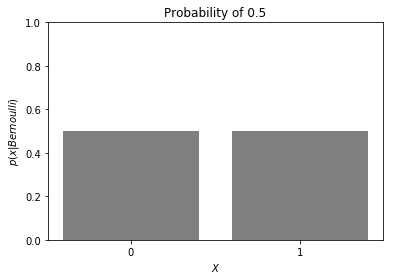

In [32]:
f, ax1 = plt.subplots(1,1)
n = 1   # 
b = 0.5
x = np.arange(0, 2)
dist = binom(n, b)
ax1.bar(x, dist.pmf(x), color='gray')
ax1.set_xticks(ticks=[0,1])
ax1.set_xlabel('$X$')
ax1.set_ylim(0,1)
ax1.set_ylabel(r'$p(x|Bernoulli)$')
ax1.set_title('Probability of 0.5');

# Finding the mean

Seen this way, it is intuitive to understand that its mean or expected value (0.5) is also equal to the probability of being heads. To help us understand when probabilities would *not* be 0.5, we can also see how we'd arrive at this answer when using the formula for average. While the common equation for average involves summing a list of numbers and dividing by the length of those numbers, there's also the approach of using [relative frequencies to determine the mean](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/random-variables-discrete/v/expected-value-of-a-discrete-random-variable).

In this case, our relative frequencies would be 0.5 for both 1 and 0.

E(*X*) = Pr(*X*=1) x 1 + Pr(*X*=0) x 0

We know that both Pr(*X*=1) and Pr(*X*=0) is 0.5:
<br>
E(*X*) = 0.5 x 1 + 0.5 x 0
<br>

Therefore:
<br>
E(*X*) = 0.5

In the end, we just have the generic formula: E(*X*) = *p*

# Finding the variance

Determining the variance for Bernoulli seems a little less intuitive, but we can use our basic understanding of variance in other contexts to help explain.

If I were asked to calculate variance for a set of values, I would take the squared distance from the mean of each number, then divide by n (the size of that set). We can use the same application of probabilities (relative frequencies) as we did for mean when calculating variance.

Var(*X*) = Pr(X=1) x (1 - E(X))^2 + Pr(X=0) x (0 - E(X))^2

I like the idea of relating it back to the equation of variance I mentioned a few lines ago, because it reminds me that the probabilities are not being squared. (When calculate variance from a list of numbers, only the terms in the denominator are squared).

From our example above, we simply plug in the probabilities and expected values.

Var(*X*) = 0.5 x (1 - 0.5)^2 + 0.5 x (0 - 0.5)^2
<br>
Var(*X*) = 0.5 x (0.5)^2 + 0.5 x (-0.5)^2
<br>
Var(*X*) = 0.5 x (0.25) + 0.5 x (0.25)
<br>
Var(*X*) = 0.25

While not immediately obvious, this answer also has the generic formula of:

Var(*X*) = p x q

Where q = 1-p.

# A case with a biased coin

Now let's imagine a case where we have a weighted coin, where heads is more likely to appear 60% of the time.

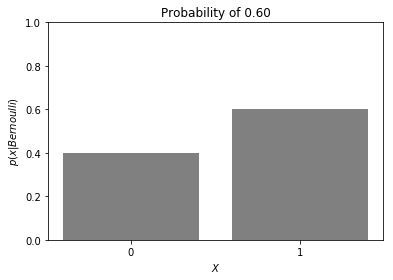

In [35]:
f, ax1 = plt.subplots(1,1)
n = 1   # 
b = 0.60
x = np.arange(0, 2)
dist = binom(n, b)
ax1.bar(x, dist.pmf(x), color='gray')
ax1.set_xticks(ticks=[0,1])
ax1.set_xlabel('$X$')
ax1.set_ylabel(r'$p(x|Bernoulli)$')
ax1.set_ylim(0,1)
ax1.set_title('Probability of 0.60');

One incorrect line of thought is to assume that the mean is in between the heights of the bars. But remember that the y-axis is the probability and the mean is somewhere on the x-axis. And using what we already know about a Bernoulli distribution, the mean or expected value simply takes on the probability *p*, commonly associated with the probability of our coin flip resulting in heads/1/true.

E(*X*) = 0.6

To determine variance, we can jump straight to our formula:
Var(*X*) = p x q
Var(*X*) = 0.6 x 0.4 = 0.24

But let's pretend we forgot this formula and go back to our approach as we did with the probability being 0.5:


Var(*X*) = Pr(X=1) x (1 - E(*X*))^2 + Pr(X=0) x (0 - E(*X*))^2
<br>
Note how we have to be more thoughtful about what we plug in for our probabilities and E(*X*).

Var(*X*) = 0.6 x (1 - 0.6)^2 + 0.4 x (0 - 0.6)^2
Var(*X*) = 0.6 x (0.4)^2 + 0.4 x (-0.6)^2
Var(*X*) = 0.6 x (0.16) + 0.4 x (0.36)
Var(*X*) = 0.24

And we arrive at the same answer as our formula.


# Understanding the relationship between probability and variance

You might notice that as we increased our probability from 0.5 to 0.6 between the two examples, the variance dropped a notch from 0.25 to 0.24. This prompts us to understand the relationship between *p* and Var(*X*). Let's create a series from *p*=0 to *p*=1 with 0.1 step intervals and find the variance at each. We'll use the formula Var(X) = *p* x *q*.


In [39]:
1-np.arange(0,1.1,0.1)

array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [48]:
df = pd.DataFrame()
df['p'] = np.arange(0,1.1,0.1)
df['q'] = 1-np.arange(0,1.1,0.1)
df['Var'] = df['p']*df['q']

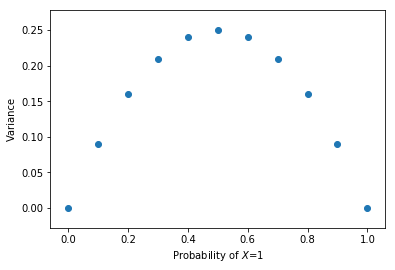

In [58]:
f, ax1 = plt.subplots()
ax1.scatter(x=df['p'], y=df['Var']);
ax1.set_xlabel('Probability of $X$=1');
ax1.set_ylabel('Variance');

We observe an interesting relationship where as p moves away from 0.5, the variance gets smaller. If we go back to the coin flip example, this is intuitive. In the most extreme case, when the probability of landing heads is 100%, there obviously wouldn't be any variance since you will always get a 1.

An extension of this concept is in determining the amount of bias if it not known *a priori*. The more biased a coin is, the fewer flips it would take to be confident it is biased.